<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas_datareader.data as web

In [2]:
dj = web.DataReader('DJIA','yahoo','1970-01-01','2018-12-31')['Close']

In [3]:
dj.head()

Date
1970-01-02    809.200012
1970-01-05    811.309998
1970-01-06    803.659973
1970-01-07    801.809998
1970-01-08    802.070007
Name: Close, dtype: float64

In [4]:
dj.tail()

Date
2018-12-24    21792.199219
2018-12-26    22878.449219
2018-12-27    23138.820312
2018-12-28    23062.400391
2018-12-31    23327.460938
Name: Close, dtype: float64

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

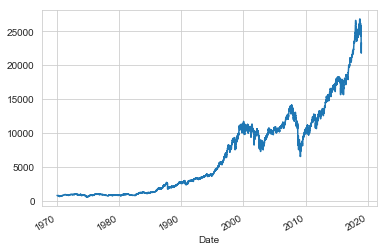

In [6]:
dj.plot();

In [7]:
# Extract 2008-2009 and assign to dj0809
dj0809 = dj.loc['2008':'2009']

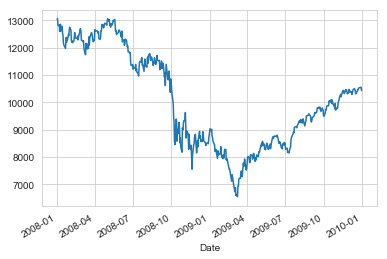

In [8]:
dj0809.plot();

In [9]:
# List of DJIA components
dj_tickers = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 
              'CSCO', 'KO', 'DOW', 'XOM', 'GS', 'HD',
              'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
              'MSFT', 'NKE','PFE', 'PG', 'TRV', 'UNH',
              'UTX', 'VZ', 'V', 'WMT', 'WBA', 'DIS']

In [10]:
dj_comp = web.DataReader(dj_tickers,'yahoo','2008-01-01')['Close']

In [11]:
dj_comp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3006 entries, 2008-01-02 to 2019-12-09
Data columns (total 30 columns):
AAPL    3006 non-null float64
AXP     3006 non-null float64
BA      3006 non-null float64
CAT     3006 non-null float64
CSCO    3006 non-null float64
CVX     3006 non-null float64
DIS     3006 non-null float64
DOW     184 non-null float64
GS      3006 non-null float64
HD      3006 non-null float64
IBM     3006 non-null float64
INTC    3006 non-null float64
JNJ     3006 non-null float64
JPM     3006 non-null float64
KO      3006 non-null float64
MCD     3006 non-null float64
MMM     3006 non-null float64
MRK     3006 non-null float64
MSFT    3006 non-null float64
NKE     3006 non-null float64
PFE     3006 non-null float64
PG      3006 non-null float64
TRV     3006 non-null float64
UNH     3006 non-null float64
UTX     3006 non-null float64
V       2953 non-null float64
VZ      3006 non-null float64
WBA     3006 non-null float64
WMT     3006 non-null float64
XOM   

In [12]:
dj_stocks = dj_comp[['AAPL','GS']]

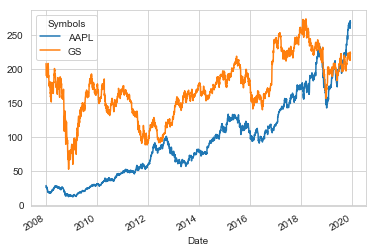

In [13]:
dj_stocks.plot();

In [14]:
# Extract AAPL and GS in 2008-09 and assign to stocks
dj_stocks = dj_comp[['AAPL','GS']].loc['2008':'2009']

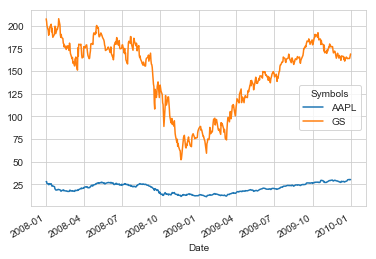

In [15]:
# Plot stocks with plot.zoo()
dj_stocks.plot();

In [16]:
dj_returns = np.log(dj).diff().dropna()

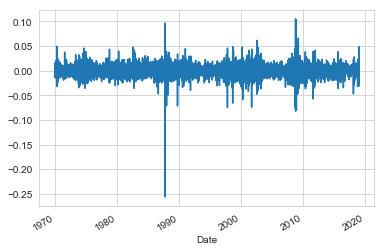

In [17]:
dj_returns.plot();

In [18]:
dj0809_returns = np.log(dj0809).diff().dropna()

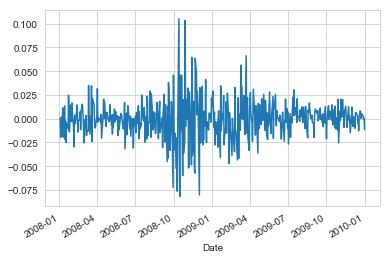

In [19]:
dj0809_returns.plot();

In [20]:
# Compute the log-returns of djstocks and assign to djstocks_x
dj_stocks_returns = np.log(dj_stocks).diff().dropna()

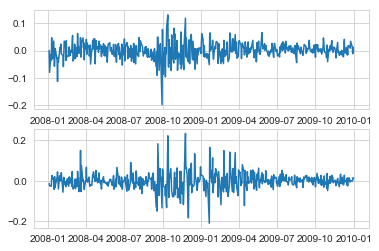

<Figure size 720x576 with 0 Axes>

In [21]:
# Plot the two share returns
fig, ax = plt.subplots(2)
plt.figure(figsize=(10,8))
ax[0].plot(dj_stocks_returns['AAPL'])
ax[1].plot(dj_stocks_returns['GS'])
plt.show();

In [22]:
dj_returns = np.log(dj.loc['2008':'2009']).diff().dropna()

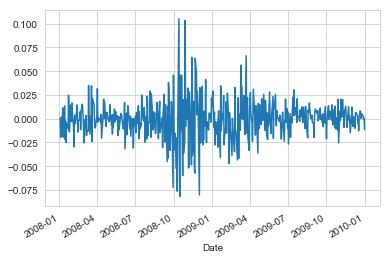

In [23]:
dj_returns.plot();

In [24]:
# Plot weekly log-returns of djx
dj_returns_w = dj_returns.resample('W').sum()

In [25]:
# Plot monthly log-returns of djx
dj_returns_m = dj_returns.resample('M').sum()#

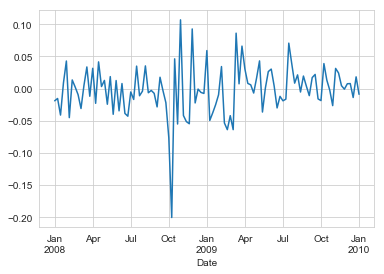

In [26]:
dj_returns_w.plot();

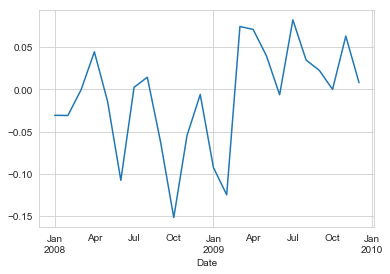

In [27]:
dj_returns_m.plot();

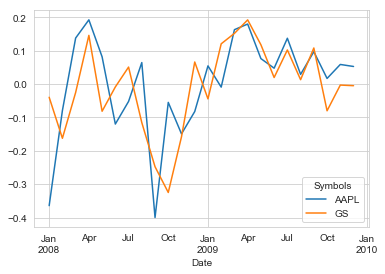

In [28]:
# Plot monthly log-returns of djreturns
dj_stocks_returns.resample('M').sum().plot();

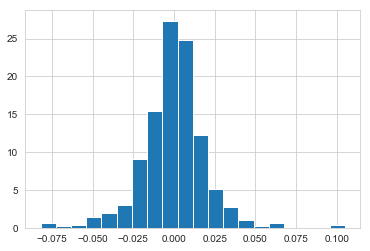

In [29]:
# Plot histogram of djx
plt.hist(dj0809_returns, bins=20, density=True);

In [30]:
import scipy as sp
from scipy import stats, random

In [31]:
mu, sigma = stats.norm.fit(dj0809_returns)

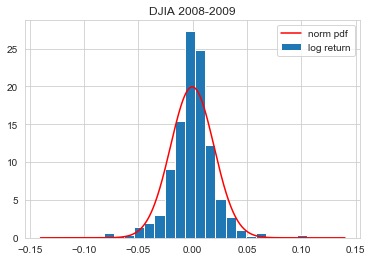

In [32]:
# Add the normal density as a red line to histogram
plt.hist(dj0809_returns, bins=20, density=True, label='log return')
x = sp.linspace(-7*sigma, 7*sigma, len(dj0809_returns))
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y, color='red', label='norm pdf')
plt.title('DJIA 2008-2009')
plt.legend();

In [33]:
nu, mu, sigma = stats.t.fit(dj0809_returns)

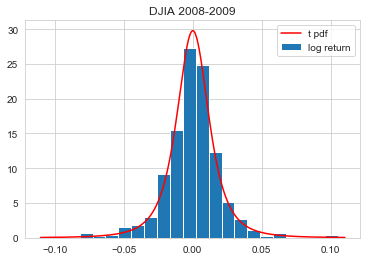

In [34]:
# Add the normal density as a red line to histogram
plt.hist(dj0809_returns, bins=20, density=True, label='log return')
x = sp.linspace(-9*sigma, 9*sigma, len(dj0809_returns))
y = stats.t.pdf(x, loc=mu, scale=sigma, df=nu)
plt.plot(x, y, color='red', label='t pdf')
plt.title('DJIA 2008-2009')
plt.legend();

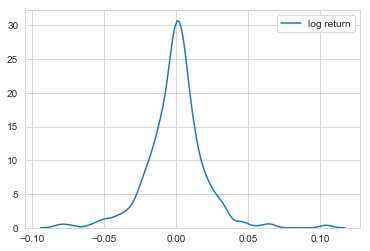

In [35]:
# Plot non-parametric KDE of djx
sns.distplot(dj0809_returns, hist=False, label='log return')
plt.xlabel('');

In [36]:
import statsmodels.api as sm

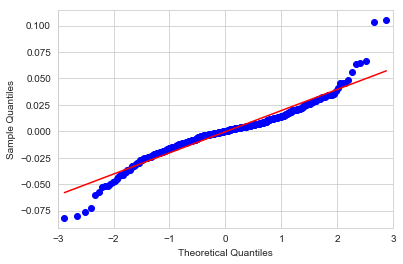

In [37]:
# Make a Q-Q plot of djx and add a red line
sm.qqplot(dj0809_returns, line = 's');

In [38]:
# Calculate the length of djx as n
n = len(dj0809_returns)

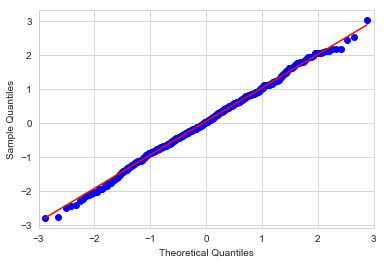

In [39]:
# Generate n standard normal variables, make a Q-Q plot, add a red line
sp.random.seed(1)
x1 = stats.norm.rvs(size= n)
sm.qqplot(x1, line='s');

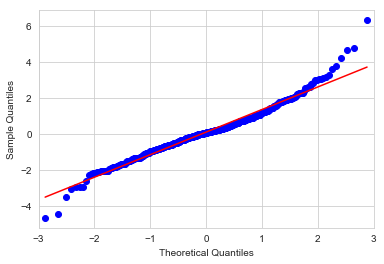

In [40]:
# Generate n Student t variables, make a Q-Q plot, add a red line
sp.random.seed(1)
x2 = stats.t.rvs(size=n, df=4)
sm.qqplot(x2, line='s');

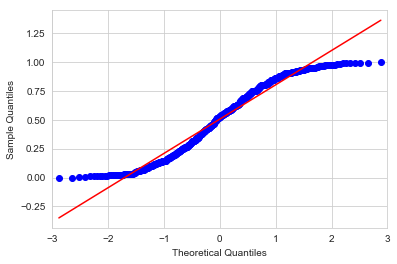

In [41]:
# Generate n standard uniform variables, make a Q-Q plot, add red line
sp.random.seed(1)
x3 = stats.uniform.rvs(size=n)
sm.qqplot(x3, line='s');

In [42]:
# Calculate skewness and kurtosis of djx
print('skew:',stats.skew(dj0809_returns))
print('kurtosis:',stats.kurtosis(dj0809_returns))

skew: 0.12631727514194652
kurtosis: 4.566701807549197


In [43]:
# Carry out a Jarque-Bera test for djx
results = sm.stats.stattools.jarque_bera(dj0809_returns)
print('Statistic:', results[0])
print('P-value:', results[1])
print('Skew:', results[2])
print('Kurtosis:', results[3])

Statistic: 439.29038191647527
P-value: 4.067294226636803e-96
Skew: 0.12631727514194652
Kurtosis: 7.566701807549197


In [44]:
# Calculate skewness and kurtosis of djreturns 
s = dj_stocks.apply(func=stats.skew, axis=0)
k = dj_stocks.apply(func=stats.kurtosis, axis=0)

In [45]:
s

Symbols
AAPL   -0.097185
GS     -0.720654
dtype: float64

In [46]:
k

Symbols
AAPL   -1.249366
GS     -0.751696
dtype: float64

In [47]:
# dj_stocks_returns['AAPL']

In [48]:
results = sm.stats.stattools.jarque_bera(dj_stocks_returns['AAPL'])

In [49]:
results

(464.40533444858863,
 1.4310768002962255e-101,
 -0.5245375138419568,
 7.58410092841956)

In [50]:
# for stock in dj_stocks_returns[stock]:
#     results = sm.stats.stattools.jarque_bera(stock)
#     print(f'{stock}:')
#     print('Statistic:', results[0])
#     print('P-value:', results[1])
#     print('Skew:', results[2])
#     print('Kurtosis:', results[3])

In [51]:
# Calculate weekly and monthly log-returns from djx_d
dj0809_returns_w = dj0809_returns.resample('W').sum()
dj0809_returns_m = dj0809_returns.resample('M').sum() #apply.monthly(djx_d, colSums)

In [52]:
# Calculate the p-value for each series in djx
results = sm.stats.stattools.jarque_bera(dj0809_returns)
print('Statistic:', results[0])
print('P-value:', results[1])
print('Skew:', results[2])
print('Kurtosis:', results[3])

Statistic: 439.29038191647527
P-value: 4.067294226636803e-96
Skew: 0.12631727514194652
Kurtosis: 7.566701807549197


In [53]:
# Calculate the p-value for each series in djx
results = sm.stats.stattools.jarque_bera(dj0809_returns_w)
print('Statistic:', results[0])
print('P-value:', results[1])
print('Skew:', results[2])
print('Kurtosis:', results[3])

Statistic: 149.47865960951515
P-value: 3.476333908927152e-33
Skew: -0.8506879173120646
Kurtosis: 8.592125806636169


In [54]:
# Calculate the p-value for each series in djx
results = sm.stats.stattools.jarque_bera(dj0809_returns_m)
print('Statistic:', results[0])
print('P-value:', results[1])
print('Skew:', results[2])
print('Kurtosis:', results[3])

Statistic: 1.6244509702935168
P-value: 0.4438691420303579
Skew: -0.6145039046668961
Kurtosis: 2.6623748011624873


In [55]:
# Calculate a 21-day moving sum of djx
dj0809_returns_r21 = dj0809_returns.rolling(window=21).sum().fillna(0)

In [56]:
# Calculate a 63-day moving sum of djx
dj0809_returns_r63 = dj0809_returns.rolling(window=63).sum().fillna(0)

In [57]:
import pandas as pd

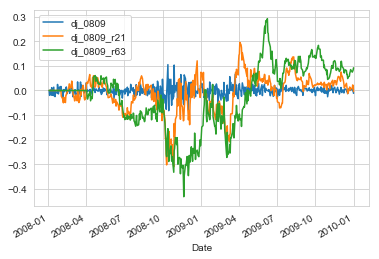

In [58]:
# Merge the three series and plot
dj0809_returns_2 = pd.concat([dj0809_returns, dj0809_returns_r21, dj0809_returns_r63], axis=1, ignore_index=False, )
dj0809_returns_2.columns = ['dj_0809', 'dj_0809_r21', 'dj_0809_r63']
dj0809_returns_2.plot();

In [59]:
# Compute the skewness and kurtosis for each series in djx2
print(f'Skew: \n{dj0809_returns_2.apply(func=stats.skew,axis=0)}\n')
print(f'Kurtosis: \n{ dj0809_returns_2.apply(func=stats.kurtosis,axis=0)}')

Skew: 
dj_0809        0.126317
dj_0809_r21   -0.980757
dj_0809_r63   -0.466767
dtype: float64

Kurtosis: 
dj_0809        4.566702
dj_0809_r21    2.004457
dj_0809_r63   -0.220652
dtype: float64


In [60]:
# Conduct the Jarque-Bera test to each series in djx2
results = sm.stats.stattools.jarque_bera(dj0809_returns_2['dj_0809'])
print('Statistic:', results[0])
print('P-value:', results[1])
print('Skew:', results[2])
print('Kurtosis:', results[3])

Statistic: 439.29038191647527
P-value: 4.067294226636803e-96
Skew: 0.12631727514194652
Kurtosis: 7.566701807549197


In [61]:
results = sm.stats.stattools.jarque_bera(dj0809_returns_2['dj_0809_r21'])
print('Statistic:', results[0])
print('P-value:',   results[1])
print('Skew:',      results[2])
print('Kurtosis:',  results[3])

Statistic: 165.17301221363172
P-value: 1.3587392408031465e-36
Skew: -0.9807567583845537
Kurtosis: 5.004456599059843


In [62]:
results = sm.stats.stattools.jarque_bera(dj0809_returns_2['dj_0809_r63'])
print('Statistic:', results[0])
print('P-value:', results[1])
print('Skew:', results[2])
print('Kurtosis:', results[3])

Statistic: 19.32362569843189
P-value: 6.366899495911637e-05
Skew: -0.4667668401874063
Kurtosis: 2.7793475132427967


In [63]:
import scipy as sp
# Fit a Student t distribution to djx
tpars = sp.stats.t.fit(data=dj0809_returns)

In [64]:
# Define nu, mu, and sigma
nu = tpars[0]
mu = tpars[1]
sigma = tpars[2]

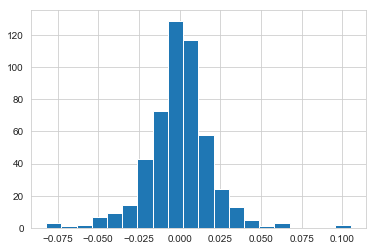

In [65]:
# Plot a histogram of djx
plt.hist(dj0809_returns, bins = 20);

In [66]:
# Compute the fitted t density at the values djx
x = sp.linspace(-9*sigma, 9*sigma, len(dj0809_returns))
y = sp.stats.t.pdf(x=x, loc=mu, scale=sigma, df=nu)

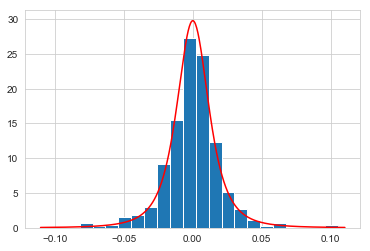

In [67]:
# Superimpose a red line to show the fitted t density
plt.hist(dj0809_returns, bins=20, density=True);
plt.plot(x, y, label='t pdf', color='red');

In [68]:
# Compute the length n of djx 
n = len(dj0809_returns)

In [69]:
#  Generate a normal sample of size n with parameters given by nparams
nparams = stats.norm.fit(dj0809_returns)
nsamples = stats.norm.rvs(loc=nparams[0], scale=nparams[1], size=n)

In [70]:
# Scale samples with the second component npars[1] and shift with the first component npars[0]
ndata = nsamples*nparams[1] + nparams[0]

In [71]:
# Generate a t-distributed sample of size n with paramaters given by tparams
tparams = stats.t.fit(dj0809_returns)
tsamples = stats.t.rvs(df=tparams[0], loc=tparams[1], scale=tparams[2], size=n)

In [72]:
# Scale and shift with tparams[1] and tparams[2] respectively
tdata = tsamples*tpars[2] + tpars[1]

In [73]:
# Make ndata and tdata into Pandas Series
n_series = pd.Series(ndata, dj0809_returns.index)
t_series = pd.Series(tdata, dj0809_returns.index)

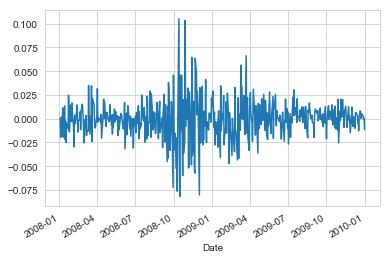

In [74]:
dj0809_returns.plot();

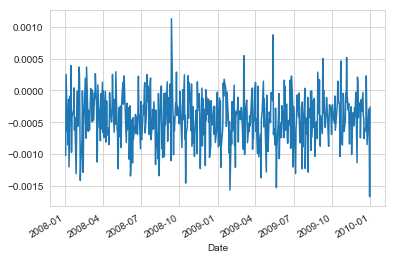

In [75]:
n_series.plot();

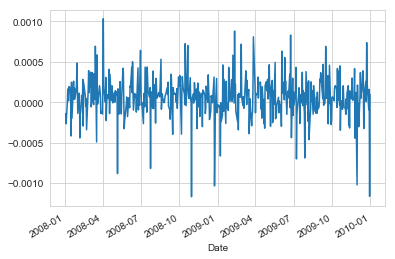

In [76]:
t_series.plot();

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

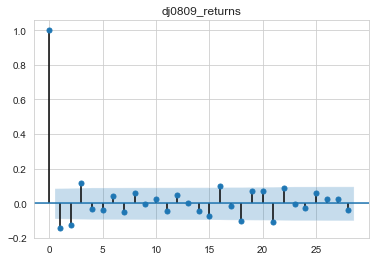

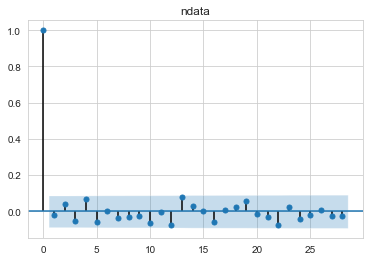

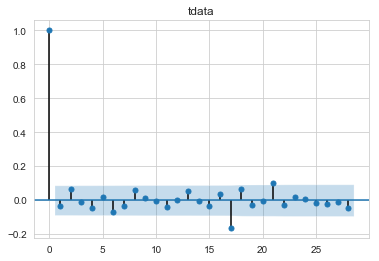

In [78]:
# Plot the acfs of djx, ndata and tdata
plot_acf(dj0809_returns, title='dj0809_returns')
plot_acf(ndata, title='ndata')
plot_acf(tdata, title='tdata');

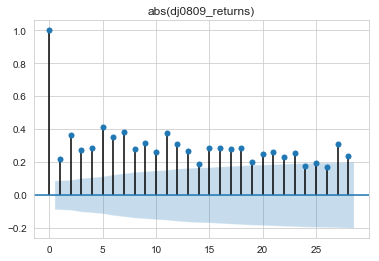

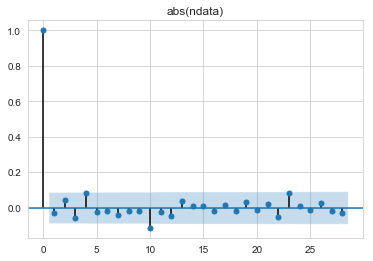

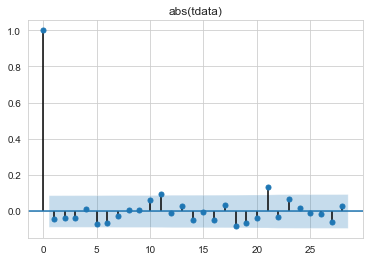

In [79]:
# Plot the acfs of the absolute values
plot_acf(abs(dj0809_returns), title='abs(dj0809_returns)')
plot_acf(abs(ndata), title='abs(ndata)')
plot_acf(abs(tdata), title='abs(tdata)');

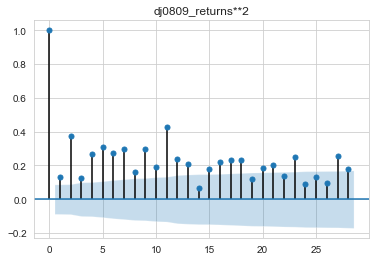

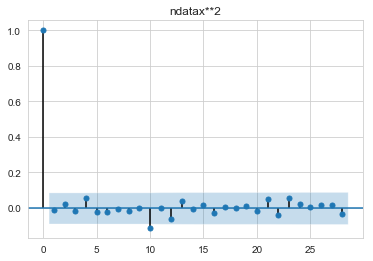

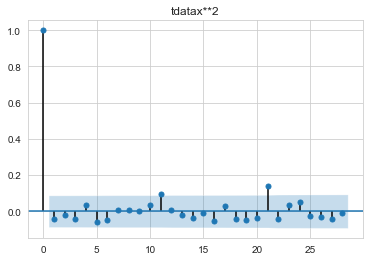

In [80]:
# Plot the acfs of the squares of the values
plot_acf(dj0809_returns**2, title='dj0809_returns**2')
plot_acf(ndata**2, title='ndatax**2')
plot_acf(tdata**2, title='tdatax**2');

In [81]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [82]:
# Apply the Ljung-Box test to djx
stat, p_value = acorr_ljungbox(dj0809_returns)
p_value.all() < 0.05

False

In [83]:
# Apply the Ljung-Box test to absolute values of djx
stat, p_value = acorr_ljungbox(abs(dj0809_returns))
p_value.all() < 0.05

False